In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import prepare
import csv

In [2]:
pd.set_option("display.max_columns", None)

In [5]:
### THIS DATAFRAME IS SPLIT BETWEEN AGGREGATED CAREER STATS AND STATS OF FIRST 30 GAMES

df = pd.read_csv('PD_merge_30.csv')
df.head(20)

,Unnamed: 0,PlayerID,Player_Name_x,Age,Height,MaxRank,Hand,Country,win%,ace_count,aces_per_game,breakpoint_count,breakpoints_per_game,top_30_win%,top_100_win%,hard_win%,clay_win%,grass_win%,carpet_win%,Unnamed: 0.1,Player_Name_y,Height(cm),Matches Played,Overall_Win%_30matches,Top_100_Win%_30matches,Top_30_Win%_30matches,First_Serve%_30matches,First_Serve_Win%_30matches,BPSave%_30matches,BPConv%_30matches,Aces/Match_30matches,DF/Match_30matches,Future Top 30
0,0,103720,Lleyton Hewitt,20.752909,180.0,1.0,R,AUS,0.70,605.0,0.925,605.0,0.925076,0.549180,0.656075,0.691906,0.648855,0.775000,0.750000,103720,Lleyton Hewitt,180.0,30,0.700000,0.689655,0.500000,0.614167,0.723759,0.642105,0.450000,3.633333,2.166667,True
1,1,103017,Nicolas Kiefer,22.535250,183.0,4.0,R,GER,0.57,355.0,0.937,355.0,0.936675,0.445860,0.531646,0.615721,0.456790,0.575758,0.555556,103017,Nicolas Kiefer,183.0,30,0.633333,0.583333,0.571429,0.512586,0.756438,0.631336,0.421053,6.333333,4.800000,True
2,2,103264,Mariano Puerta,26.904860,180.0,9.0,L,ARG,0.49,147.0,0.948,147.0,0.948387,0.250000,0.436508,0.400000,0.559633,0.000000,0.125000,103264,Mariano Puerta,180.0,30,0.333333,0.259259,0.090909,0.655638,0.652213,0.633094,0.423913,3.866667,2.166667,True
3,3,102845,Carlos Moya,22.546201,190.0,1.0,R,ESP,0.64,444.0,0.957,444.0,0.956897,0.500000,0.597297,0.563536,0.704280,0.500000,0.583333,102845,Carlos Moya,190.0,30,0.633333,0.545455,0.454545,0.537364,0.683812,0.648464,0.405229,4.266667,3.666667,True
4,4,102563,Thomas Johansson,27.214237,180.0,7.0,R,SWE,0.54,328.0,0.909,328.0,0.908587,0.308333,0.489933,0.550505,0.369231,0.666667,0.613636,102563,Thomas Johansson,180.0,30,0.533333,0.428571,0.375000,0.509013,0.754888,0.625571,0.410959,7.666667,3.233333,True
5,5,102856,Gustavo Kuerten,24.347707,190.0,1.0,R,BRA,0.66,278.0,0.903,278.0,0.902597,0.495238,0.619658,0.585366,0.729730,0.636364,0.576923,102856,Gustavo Kuerten,190.0,30,0.700000,0.703704,0.692308,0.547696,0.750725,0.604061,0.489177,6.633333,2.166667,True
6,6,102610,Albert Costa,27.074606,180.0,6.0,R,ESP,0.57,253.0,0.969,253.0,0.969349,0.500000,0.526316,0.430380,0.652695,0.000000,0.384615,102610,Albert Costa,180.0,30,0.633333,0.615385,0.600000,0.666297,0.709562,0.621053,0.383065,4.666667,2.200000,True
7,7,102998,Jan Michael Gambill,24.041068,190.0,14.0,R,USA,0.49,226.0,0.966,226.0,0.965812,0.282353,0.415730,0.557692,0.200000,0.562500,0.272727,102998,Jan Michael Gambill,190.0,30,0.500000,0.416667,0.200000,0.563822,0.760015,0.615000,0.392473,9.900000,2.933333,True
8,8,103151,Mariano Zabaleta,22.113621,183.0,21.0,R,ARG,0.49,257.0,0.955,257.0,0.955390,0.494118,0.467593,0.413793,0.551724,0.000000,0.250000,103151,Mariano Zabaleta,183.0,30,0.566667,0.560000,0.416667,0.555473,0.691015,0.575472,0.414847,4.200000,3.600000,True
9,9,102854,Sjeng Schalken,26.633812,193.0,11.0,R,NED,0.56,255.0,0.917,255.0,0.917266,0.287500,0.518692,0.575342,0.476190,0.650000,0.586207,102854,Sjeng Schalken,193.0,30,0.500000,0.625000,0.250000,0.632795,0.696382,0.602190,0.458678,3.933333,3.400000,True


True     139
False     93
Name: Future Top 30, dtype: int64


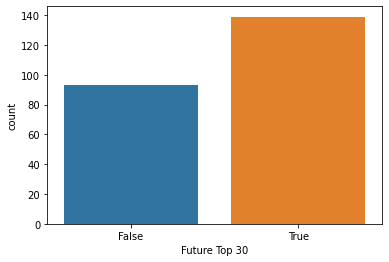

In [10]:
print(df['Future Top 30'].value_counts())
sns.countplot(x='Future Top 30', data=df);

In [11]:
df.describe()

,Unnamed: 0,PlayerID,Age,Height,MaxRank,win%,ace_count,aces_per_game,breakpoint_count,breakpoints_per_game,top_30_win%,top_100_win%,hard_win%,clay_win%,grass_win%,carpet_win%,Unnamed: 0.1,Height(cm),Matches Played,Overall_Win%_30matches,Top_100_Win%_30matches,Top_30_Win%_30matches,First_Serve%_30matches,First_Serve_Win%_30matches,BPSave%_30matches,BPConv%_30matches,Aces/Match_30matches,DF/Match_30matches
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.0,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000
mean,122.612069,106200.581897,25.266893,185.629310,28.866379,0.497026,256.090517,0.949284,256.090517,0.949295,0.305108,0.439973,0.476048,0.468479,0.409956,0.268086,106200.581897,185.629310,30.0,0.453592,0.399734,0.275745,0.594462,0.698578,0.595330,0.395704,5.527299,3.234770
std,71.509364,8709.053041,2.876438,6.962522,24.110753,0.101347,186.055979,0.049403,186.055979,0.049405,0.130134,0.118599,0.124512,0.153484,0.215691,0.289042,8709.053041,6.962522,0.0,0.102572,0.118473,0.161676,0.041611,0.038431,0.040436,0.046450,2.973999,0.939941
min,0.000000,100644.000000,19.178645,168.000000,1.000000,0.280000,33.000000,0.701000,33.000000,0.701299,0.045455,0.176471,0.071429,0.000000,0.000000,0.000000,100644.000000,168.000000,30.0,0.233333,0.100000,0.000000,0.460628,0.601868,0.493671,0.211679,0.533333,1.166667
25%,59.750000,103451.500000,23.121150,180.750000,9.000000,0.430000,100.500000,0.930750,100.500000,0.930338,0.214048,0.356567,0.397682,0.375000,0.272727,0.000000,103451.500000,180.750000,30.0,0.400000,0.318182,0.166667,0.565134,0.672066,0.566986,0.367573,3.500000,2.566667
50%,123.500000,104378.500000,24.695414,185.000000,22.500000,0.490000,220.000000,0.961500,220.000000,0.961615,0.294118,0.427521,0.465041,0.489362,0.435340,0.207143,104378.500000,185.000000,30.0,0.450000,0.391304,0.250000,0.594353,0.695304,0.595253,0.394154,4.866667,3.066667
75%,184.250000,105380.500000,26.976044,190.000000,43.000000,0.560000,356.000000,0.983250,356.000000,0.983299,0.384066,0.515058,0.557692,0.566244,0.569581,0.500000,105380.500000,190.000000,30.0,0.500000,0.458333,0.375000,0.617803,0.723304,0.623084,0.427148,6.775000,3.741667
max,245.000000,200282.000000,33.464750,211.000000,128.000000,0.840000,1068.000000,1.000000,1068.000000,1.000000,0.756696,0.825417,0.838951,0.926230,0.874172,1.000000,200282.000000,211.000000,30.0,0.733333,0.750000,0.700000,0.747014,0.822428,0.712042,0.530387,20.133333,7.066667


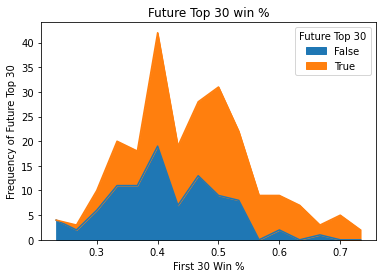

In [21]:
# Looking at the distribution of Win% of future 30 matches

pd.crosstab(df['Overall_Win%_30matches'], df['Future Top 30']).plot(kind='area')
plt.title("Future Top 30 win %")
plt.xlabel('First 30 Win %')
plt.ylabel('Frequency of Future Top 30');

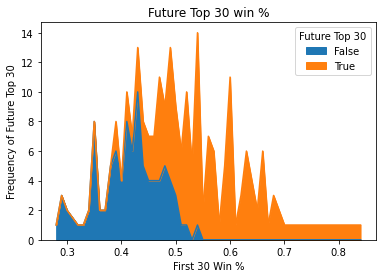

In [24]:
## Looking at players career Win% if they made it into the top 30

pd.crosstab(df['win%'], df['Future Top 30']).plot(kind='area')
plt.title("Future Top 30 win %")
plt.xlabel('First 30 Win %')
plt.ylabel('Frequency of Future Top 30');

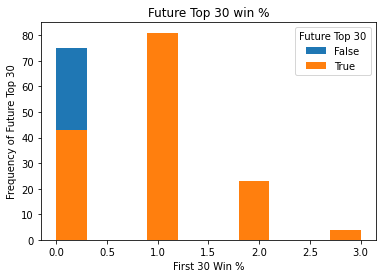

In [26]:
pd.crosstab(df['Aces/Match_30matches'], df['Future Top 30']).plot(kind='hist')
plt.title("Future Top 30 win %")
plt.xlabel('First 30 Win %')
plt.ylabel('Frequency of Future Top 30');

In [ ]:
### Scale Features
### More vizs
### Modeling
